<a href="https://colab.research.google.com/github/BogdanT54/Cicluri-Economice-si-Randamentul-Pietelor/blob/main/MSGARCH_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Instalare si incarcare pachete
install.packages("MSGARCH")  # doar daca nu este deja instalat
install.packages("forecast") # pentru modelul ARIMA
install.packages("tseries")  # teste de stationaritate

library(MSGARCH)
library(forecast)
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘zoo’, ‘expm’, ‘fanplot’, ‘numDeriv’, ‘RcppArmadillo’




In [ ]:
serie <- read.csv('/content/Bitcoin.csv')

serie

Period,Open,High,Low,Close,volume,marketCap
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14-Jul-10,0.05815725,0.06158806,0.04864654,0.05640216,261.54,190259.6
15-Jul-10,0.05640261,0.06795437,0.05396921,0.05756808,445.80,195982.1
16-Jul-10,0.05800138,0.07222029,0.05748353,0.06649170,497.25,228047.4
17-Jul-10,0.06649990,0.07773513,0.05741781,0.06599255,19.99,226904.8
18-Jul-10,0.06608795,0.08085810,0.06422061,0.07881380,75.13,271669.2
19-Jul-10,0.07879913,0.08360209,0.06903579,0.07416855,573.24,256302.4
20-Jul-10,0.07413588,0.07751477,0.06428795,0.07195755,262.35,249313.1
21-Jul-10,0.07193466,0.07646131,0.06425164,0.07439057,572.81,258512.8
22-Jul-10,0.07417871,0.07503002,0.05103308,0.05887483,2167.06,205112.5


In [ ]:
# 3. Ajustam un model ARIMA pe serie
serie_log <- diff(log(serie$Close))
model_arima <- arima(serie_log, order = c(2,0,3))
model_arima


Call:
arima(x = serie_log, order = c(2, 0, 3))

Coefficients:
         ar1     ar2      ma1      ma2      ma3  intercept
      0.6143  0.3383  -0.6668  -0.2381  -0.0225     0.0029
s.e.  0.1871  0.1782   0.1871   0.1910   0.0220     0.0010

sigma^2 estimated as 0.002309:  log likelihood = 8775.96,  aic = -17537.91

In [ ]:
# 4. Extragem reziduurile ARIMA
rezid_arima <- residuals(model_arima)

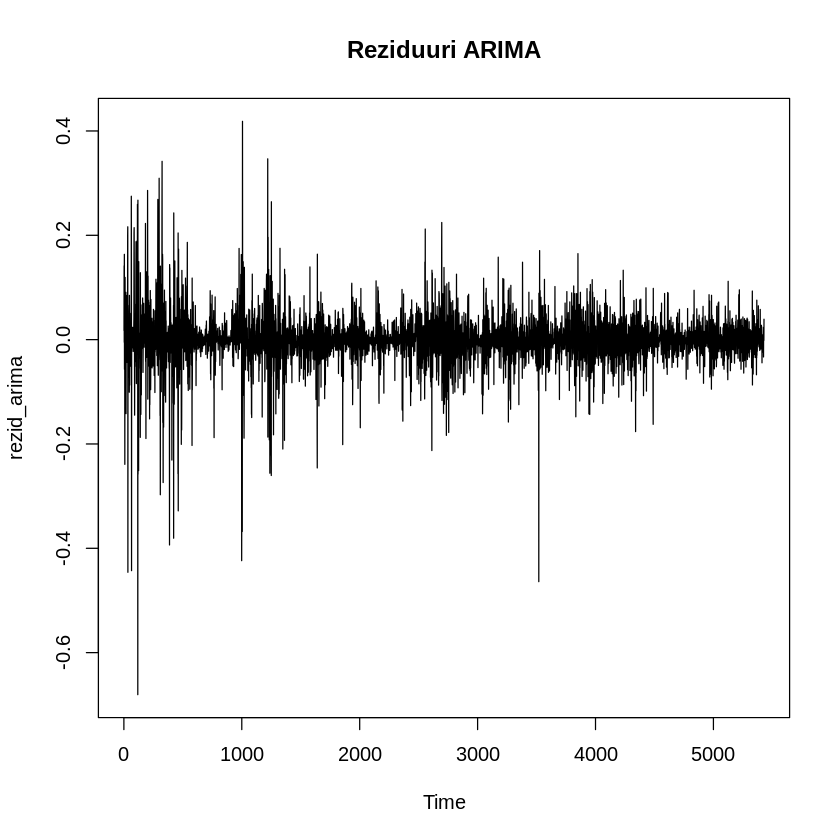

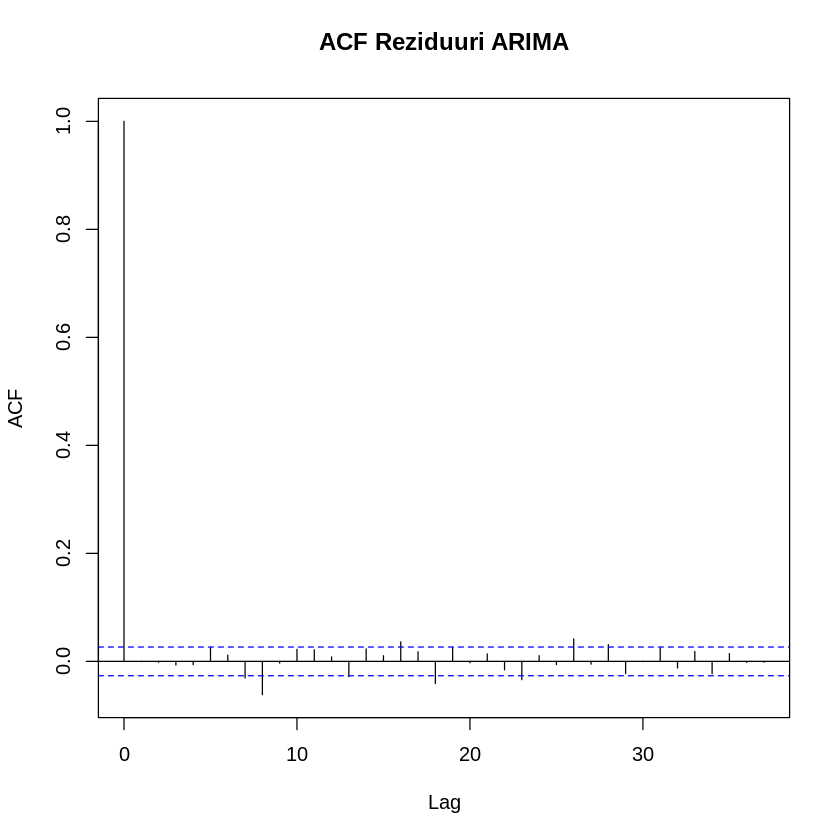

In [ ]:
# Verificam reziduurile
plot.ts(rezid_arima, main = "Reziduuri ARIMA")
acf(rezid_arima, main = "ACF Reziduuri ARIMA")

In [ ]:
# 5. Ajustam un model Markov-Switching GARCH pe reziduuri
# MSGARCH are mai multe specificatii posibile, de exemplu:
# 2 regimuri, fiecare cu model GARCH(1,1), distributie normală
model_spec <- CreateSpec(variance.spec = list(model = "eGARCH"),
                         distribution.spec = list(distribution = "std"),
                         switch.spec = list(K = 10))

In [ ]:
# Ajustam modelul
model_fit <- FitML(spec = model_spec, data = rezid_arima)

In [ ]:
# Sumara model
summary(model_fit)

Specification type: Markov-switching
Specification name: eGARCH_std eGARCH_std eGARCH_std
Number of parameters in each variance model: 4 4 4
Number of parameters in each distribution: 1 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error       t value  Pr(>|t|)
alpha0_1  -1.4098     0.7752 -1.818600e+00 3.449e-02
alpha1_1   0.0832     0.0523  1.590400e+00 5.587e-02
alpha2_1   0.0597     0.0472  1.263700e+00 1.032e-01
beta_1     0.8707     0.0759  1.146450e+01    <1e-16
nu_1      77.3996   109.4424  7.072000e-01 2.397e-01
alpha0_2  -0.3081     0.0873 -3.528300e+00 2.091e-04
alpha1_2   0.2533     0.0419  6.048200e+00 7.321e-10
alpha2_2  -0.0718     0.0249 -2.885400e+00 1.954e-03
beta_2     0.9516     0.0137  6.922700e+01    <1e-16
nu_2       3.2136     0.2981  1.077870e+01    <1e-16
alpha0_3  -0.

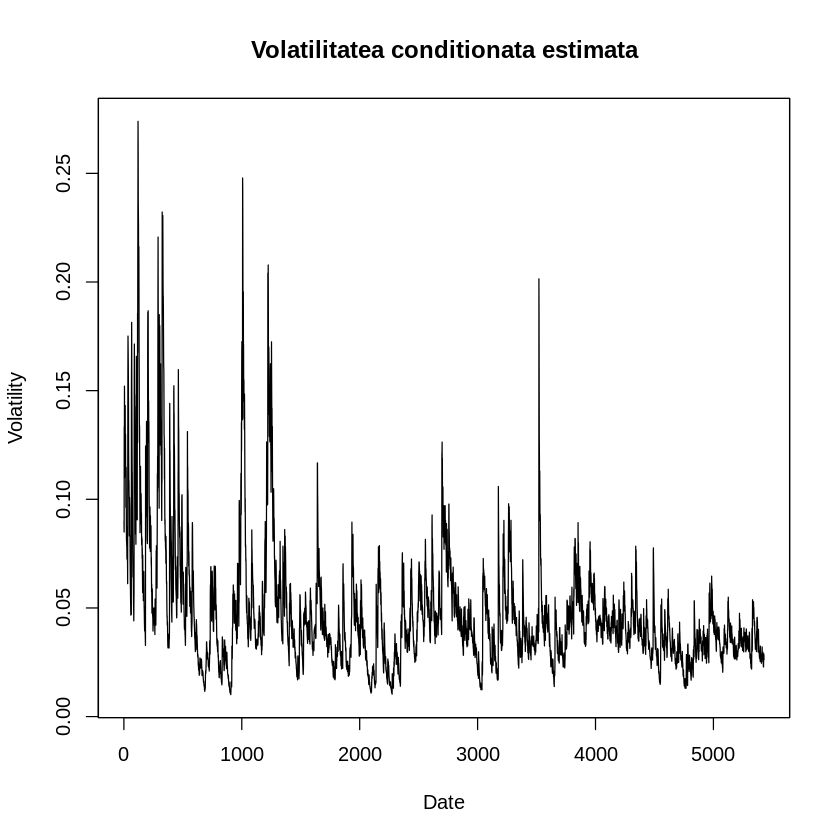

In [ ]:
# 6. Plotam volatilitatea conditionata estimata
volatilitate <- Volatility(model_fit)
plot(volatilitate, type = "l", main = "Volatilitatea conditionata estimata")

In [ ]:
# 8️⃣ MATRICEA DE TRANZITIE
TransMat(model_fit)

,t+1|k=1,t+1|k=2,t+1|k=3
t|k=1,4.366703e-01,0.002047873,0.561281849
t|k=2,9.953811e-11,0.995381099,0.004618901
t|k=3,1.580020e-01,0.005699084,0.836298899


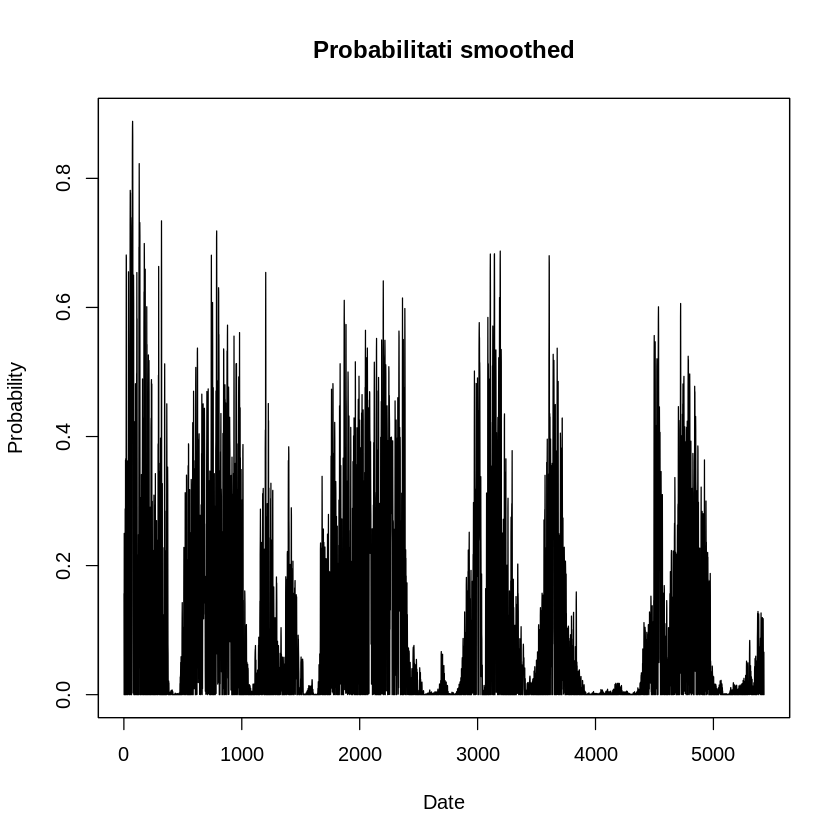

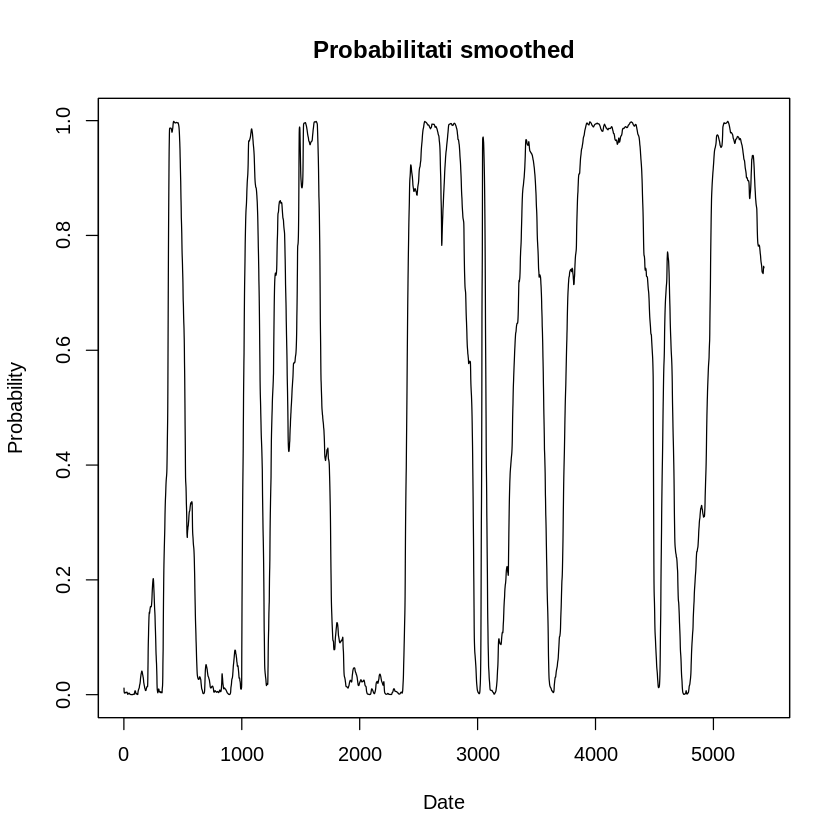

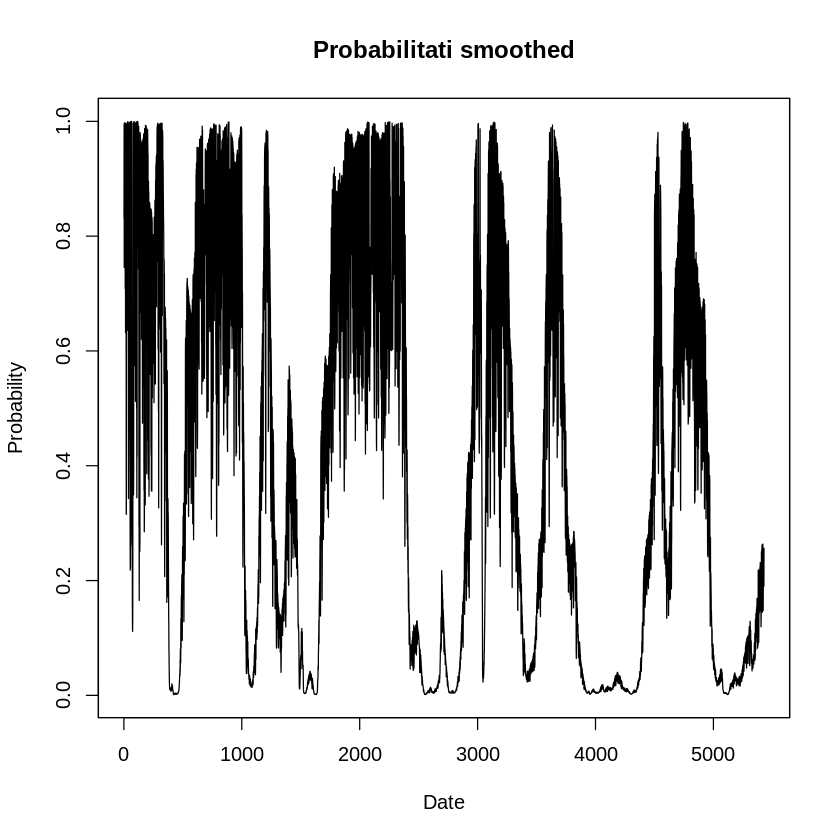

In [ ]:
# 9️⃣ PROBABILITATILE DE STARE (SMOOTHED)
state_probs <- State(model_fit)
plot(state_probs, type.prob = "smoothed", main = "Probabilitati smoothed")

In [ ]:
# 7️⃣ EXTRAGEREA REGIMURILOR INDIVIDUALE
regimuri <- ExtractStateFit(model_fit)
print(regimuri)

[[1]]
Specification type: Single-regime
Specification name: eGARCH_std
Number of parameters in variance model: 4
Number of parameters in distribution: 1
------------------------------------------
Fitted parameters:
            Estimate
alpha0_1 -1.40984679
alpha1_1  0.08315737
alpha2_1  0.05966122
beta_1    0.87065544
nu_1     77.39964922
------------------------------------------
LL: -15752.8141
AIC: 31515.6283
BIC: 31548.6258
------------------------------------------

[[2]]
Specification type: Single-regime
Specification name: eGARCH_std
Number of parameters in variance model: 4
Number of parameters in distribution: 1
------------------------------------------
Fitted parameters:
            Estimate
alpha0_1 -0.30805930
alpha1_1  0.25327375
alpha2_1 -0.07181917
beta_1    0.95155924
nu_1      3.21356820
------------------------------------------
LL: 10838.0508
AIC: -21666.1017
BIC: -21633.1041
------------------------------------------

[[3]]
Specification type: Single-regime
Specifi

$VaR
Time Series:
Start = 5430 
End = 5434 
Frequency = 1 
            0.01        0.05
5430 -0.08016747 -0.04188415
5431 -0.07687669 -0.04057493
5432 -0.08605062 -0.04177003
5433 -0.08603485 -0.04500992
5434 -0.08531713 -0.04311759

$ES
Time Series:
Start = 5430 
End = 5434 
Frequency = 1 
           0.01        0.05
5430 -0.1192046 -0.06710754
5431 -0.1141062 -0.06544053
5432 -0.1370449 -0.07293715
5433 -0.1321282 -0.07308271
5434 -0.1422035 -0.07498749



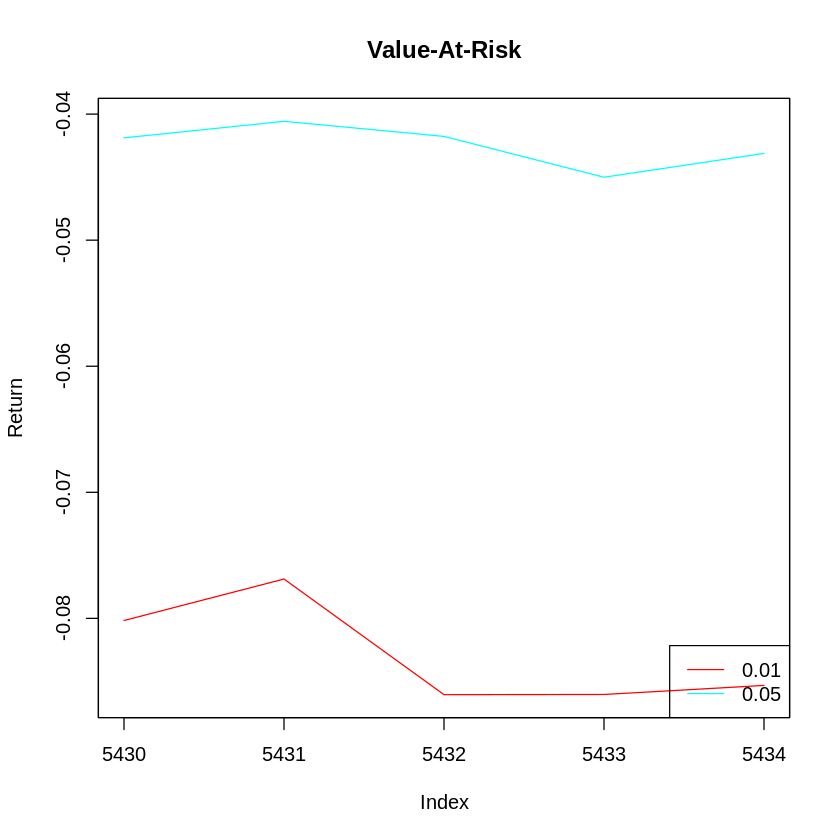

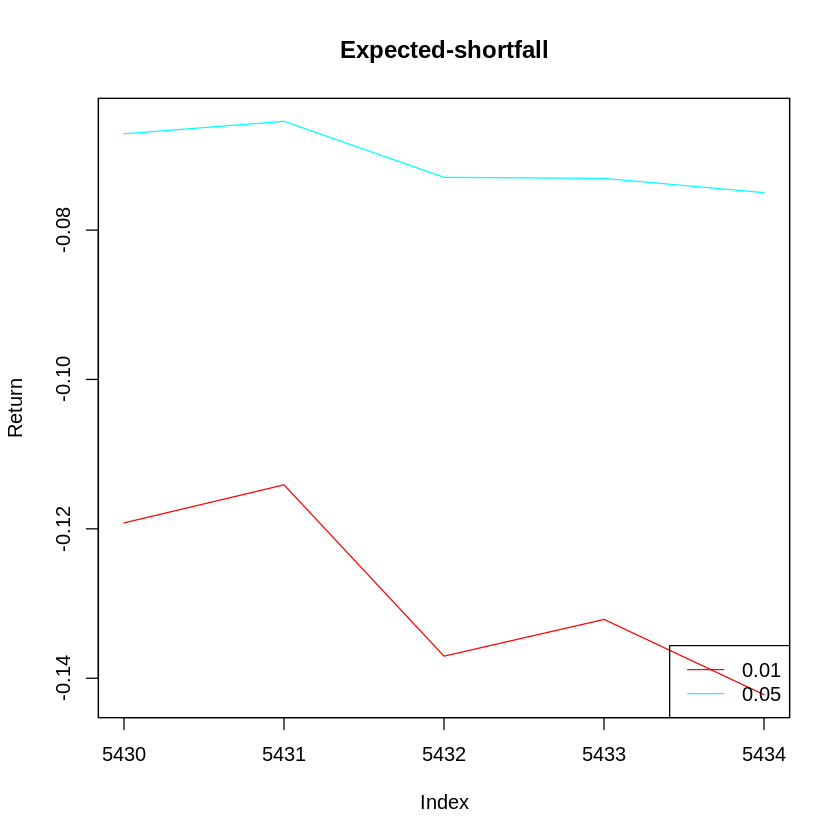

In [ ]:
# 6️⃣ RISK: VaR și ES
risk_measures <- Risk(model_fit, nahead = 5)
print(risk_measures)
plot(risk_measures)